In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv("BTC-USD-15-MIN.csv")
df.head(10)

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2021-09-27 14:45:00+01:00,43443.062500,43555.515625,43443.062500,43548.773438,43548.773438,50628608
1,2021-09-27 15:00:00+01:00,43547.558594,43616.171875,43482.406250,43567.480469,43567.480469,54437888
2,2021-09-27 15:15:00+01:00,43557.968750,43656.312500,43485.089844,43631.105469,43631.105469,45457408
3,2021-09-27 15:30:00+01:00,43632.500000,44027.242188,43353.429688,43443.820312,43443.820312,302301184
4,2021-09-27 15:45:00+01:00,43425.750000,43485.988281,43186.468750,43186.468750,43186.468750,14149632
5,2021-09-27 16:00:00+01:00,43231.644531,43308.800781,43108.304688,43108.304688,43108.304688,91897856
6,2021-09-27 16:15:00+01:00,43123.804688,43211.675781,43096.398438,43201.843750,43201.843750,0
7,2021-09-27 16:30:00+01:00,43198.273438,43238.671875,43116.597656,43121.804688,43121.804688,33259520
8,2021-09-27 16:45:00+01:00,43148.785156,43327.664062,43097.687500,43327.664062,43327.664062,122202112
9,2021-09-27 17:00:00+01:00,43306.003906,43369.042969,43290.355469,43295.789062,43295.789062,0


In [3]:
df.tail(10)

,Datetime,Open,High,Low,Close,Adj Close,Volume
8711,2021-12-29 11:45:00+00:00,47670.960938,47744.574219,47612.550781,47744.574219,47744.574219,72927232
8712,2021-12-29 12:00:00+00:00,47757.929688,47786.925781,47042.066406,47070.554688,47070.554688,325949440
8713,2021-12-29 12:15:00+00:00,47009.242188,47022.921875,46824.027344,46865.765625,46865.765625,389271552
8714,2021-12-29 12:30:00+00:00,46868.468750,46924.054688,46818.714844,46903.308594,46903.308594,302127104
8715,2021-12-29 12:45:00+00:00,46915.027344,46995.000000,46885.828125,46913.417969,46913.417969,198434816
8716,2021-12-29 13:00:00+00:00,46882.003906,46965.085938,46849.621094,46907.347656,46907.347656,117071872
8717,2021-12-29 13:15:00+00:00,46898.257812,46952.664062,46730.207031,46730.207031,46730.207031,119171072
8718,2021-12-29 13:30:00+00:00,46694.046875,46934.816406,46694.046875,46934.816406,46934.816406,312217600
8719,2021-12-29 13:45:00+00:00,46910.324219,46988.507812,46910.324219,46988.507812,46988.507812,96284672
8720,2021-12-29 13:50:02+00:00,47037.710938,47037.710938,47037.710938,47037.710938,47037.710938,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8721 entries, 0 to 8720
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Datetime   8721 non-null   object 
 1   Open       8721 non-null   float64
 2   High       8721 non-null   float64
 3   Low        8721 non-null   float64
 4   Close      8721 non-null   float64
 5   Adj Close  8721 non-null   float64
 6   Volume     8721 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 477.1+ KB


In [5]:
df.isnull().sum()

,0
Datetime,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


**Preprocessing**

In [6]:
df['Datetime'] = pd.to_datetime(df['Datetime'], utc=True)

df['Datetime'] = df['Datetime'].dt.tz_convert(None)

df.set_index('Datetime', inplace=True)


In [8]:
df.info()

df.head(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8721 entries, 2021-09-27 13:45:00 to 2021-12-29 13:50:02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8721 non-null   float64
 1   High       8721 non-null   float64
 2   Low        8721 non-null   float64
 3   Close      8721 non-null   float64
 4   Adj Close  8721 non-null   float64
 5   Volume     8721 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 476.9 KB


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-09-27 13:45:00,43443.062500,43555.515625,43443.062500,43548.773438,43548.773438,50628608
2021-09-27 14:00:00,43547.558594,43616.171875,43482.406250,43567.480469,43567.480469,54437888
2021-09-27 14:15:00,43557.968750,43656.312500,43485.089844,43631.105469,43631.105469,45457408
2021-09-27 14:30:00,43632.500000,44027.242188,43353.429688,43443.820312,43443.820312,302301184
2021-09-27 14:45:00,43425.750000,43485.988281,43186.468750,43186.468750,43186.468750,14149632
2021-09-27 15:00:00,43231.644531,43308.800781,43108.304688,43108.304688,43108.304688,91897856
2021-09-27 15:15:00,43123.804688,43211.675781,43096.398438,43201.843750,43201.843750,0
2021-09-27 15:30:00,43198.273438,43238.671875,43116.597656,43121.804688,43121.804688,33259520
2021-09-27 15:45:00,43148.785156,43327.664062,43097.687500,43327.664062,43327.664062,122202112


In [9]:
# select close price
close_prices = df['Close'].values.reshape(-1, 1)

# normalize the close price data
scaler = MinMaxScaler()
close_price_scaled = scaler.fit_transform(close_prices)

**Set tf.data.Dataset for model inputs**

In [10]:
# Creating the dataset fxn
def create_dataset(data, time_steps=96):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(x), np.array(y)

time_steps = 96 # 24 hours of 15 minute data

# Create datasets
X, y = create_dataset(close_price_scaled, time_steps)

# Check shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (8625, 96, 1)
y shape: (8625, 1)


In [11]:
# splitting into train and test sets

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [14]:
# Using tf.data.Dataset with shuffling and better batching
batch_size = 32
buffer_size = 1000

train_dataset = (
    tf.data.Dataset.from_tensor_slices((X_train, y_train))
    .shuffle(buffer_size)
    .batch(batch_size)
    .prefetch(tf.data.experimental.AUTOTUNE)
)

test_dataset = (
    tf.data.Dataset.from_tensor_slices((X_test, y_test))
    .batch(batch_size)
    .prefetch(tf.data.experimental.AUTOTUNE)
)

**Model Architecture**

In [15]:
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 96, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 96, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

**Model Training**

In [16]:
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=test_dataset,
    verbose=1
)

Epoch 1/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0272 - val_loss: 2.1745e-04
Epoch 2/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - loss: 0.0044 - val_loss: 5.4759e-04
Epoch 3/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0039 - val_loss: 2.1392e-04
Epoch 4/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0033 - val_loss: 1.3743e-04
Epoch 5/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0030 - val_loss: 2.4143e-04
Epoch 6/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0026 - val_loss: 2.0013e-04
Epoch 7/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0024 - val_loss: 1.7561e-04
Epoch 8/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0021 - val_loss: 3.3565e-04
Epoch 9/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0019 - val_loss: 2.5249e-04
Epoch 10/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0017 - val_loss: 1.7114e-04
Epoch 11/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0015 - val_loss: 2.857

In [17]:
# Saving the model
model.save('btc_forecasting_model.h5')

In [18]:
# Getting the MSE
train_loss = model.evaluate(train_dataset)
test_loss = model.evaluate(test_dataset)
print(f"Train MSE: {train_loss:.4f}")
print(f"Test MSE: {test_loss:.4f}")

216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.3441e-04
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8152e-04
Train MSE: 0.0003
Test MSE: 0.0002


In [19]:
predictions = model.predict(test_dataset)

54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


In [20]:
# reshape y_test to a 2D array
y_test_2d = y_test.reshape(-1, 1)

predictions = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test_2d)

In [21]:
mae = np.mean(np.abs(predictions - y_test_inv))
rmse = np.sqrt(np.mean((predictions - y_test_inv)**2))
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Square Error: {rmse:.2f}")

Mean Absolute Error: 285.36
Root Mean Square Error: 366.72


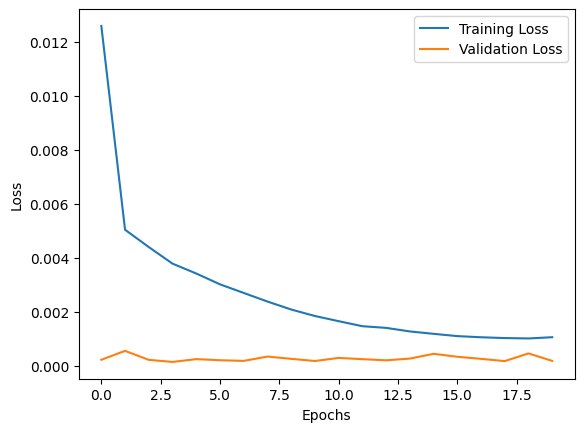

In [23]:
# Plotting training and validation loss for better insight
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

In [24]:
# Making predictions on the test set
predictions = model.predict(test_dataset)
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


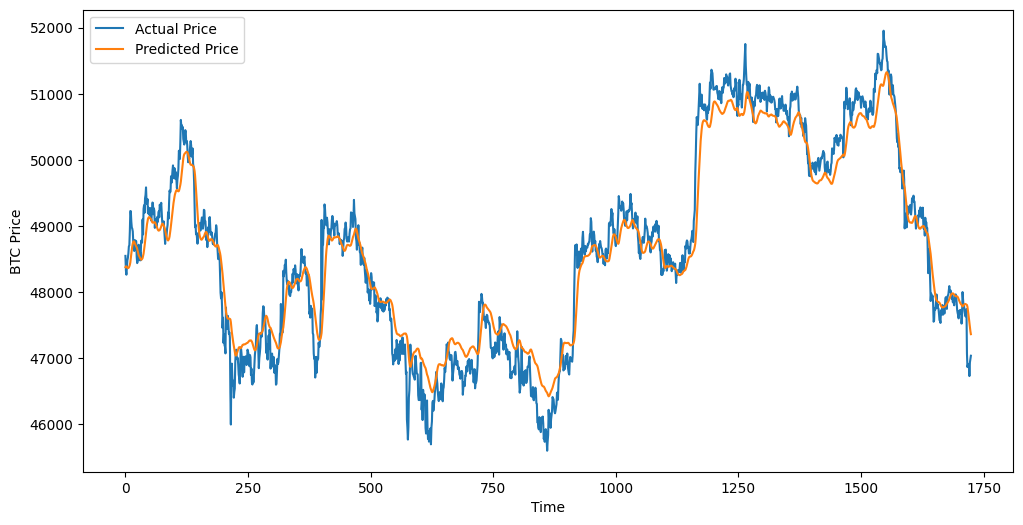

In [25]:
# Plotting actual vs predicted prices to evaluate model performance
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label="Actual Price")
plt.plot(predicted_prices, label="Predicted Price")
plt.xlabel('Time')
plt.ylabel('BTC Price')
plt.legend()
plt.show();

In [26]:
# Using a different activation function and increasing the dropout on the model to check performance

model1 = Sequential([
    LSTM(50, activation='tanh', return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.3),
    LSTM(50, activation='tanh'),
    Dropout(0.3),
    Dense(1)
])

model1.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 96, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 96, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history1 = model1.fit(
    train_dataset,
    epochs=20,
    validation_data=test_dataset,
    verbose=1
)

Epoch 1/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0132 - val_loss: 4.3834e-04
Epoch 2/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0039 - val_loss: 1.9653e-04
Epoch 3/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0033 - val_loss: 1.9677e-04
Epoch 4/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0027 - val_loss: 1.3364e-04
Epoch 5/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0024 - val_loss: 1.4130e-04
Epoch 6/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0022 - val_loss: 1.3703e-04
Epoch 7/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0017 - val_loss: 1.0619e-04
Epoch 8/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0016 - val_loss: 1.8263e-04
Epoch 9/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0014 - val_loss: 1.1487e-04
Epoch 10/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0012 - val_loss: 1.3302e-04
Epoch 11/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0011 - val_loss: 1.5038e-

In [28]:
# Saving the model
model1.save('btc_forecasting_model1.h5')

In [30]:
# Getting the MSE
train_loss1 = model1.evaluate(train_dataset)
test_loss1 = model1.evaluate(test_dataset)
print(f"Train MSE1: {train_loss1:.4f}")
print(f"Test MSE1: {test_loss1:.4f}")

216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4202e-04
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3114e-04
Train MSE1: 0.0002
Test MSE1: 0.0001


In [31]:
# Making predictions
predictions_1 = model1.predict(test_dataset)

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [32]:
# Scaling the values
predicted_prices_1 = scaler.inverse_transform(predictions_1)
actual_prices_1 = scaler.inverse_transform(y_test.reshape(-1, 1))

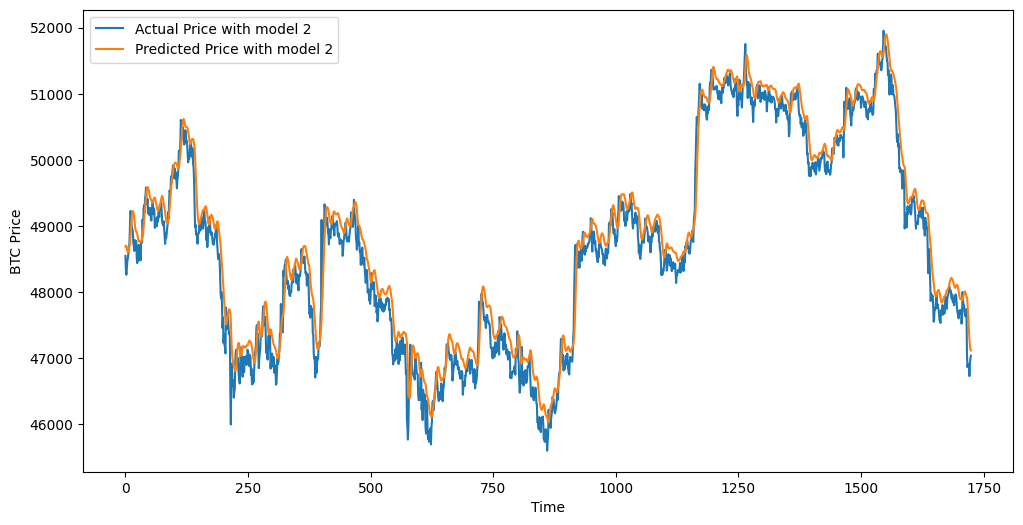

<Figure size 640x480 with 0 Axes>

In [34]:
# Plotting actual vs predicted prices to evaluate model's 2 performance
plt.figure(figsize=(12, 6))
plt.plot(actual_prices_1, label="Actual Price with model 2")
plt.plot(predicted_prices_1, label="Predicted Price with model 2")
plt.xlabel('Time')
plt.ylabel('BTC Price')
plt.legend()
plt.show();
plt.savefig('btc_price_prediction_2.png')